In [3]:
# Import required packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# Getting the data ready
# Generate train dummy data for 1000 Students and dummy testfor 500
#Columns :Age, Hours of Study &Avg Previous test scores np.random.seed(2018) 
# #Setting seed for reproducibility
train_data, test_data = np.random.random((1000, 3)), np.random.random((500, 3))
#Generate dummy results for 1000 students : Whether Passed (1) or Failed (0)
labels = np.random.randint(2, size=(1000, 1))
#Defining the model structure with the required layers, 
# ofneurons, activation function and optimizers
model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
#Train the model and make predictions
model.fit(train_data, labels, epochs=10, batch_size=32)
#Make predictions from the trained model
9
predictions = model.predict(test_data)


Epoch 1/10
32/32 [==============================] - 4s 7ms/step - loss: 0.7220 - accuracy: 0.4990
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7052 - accuracy: 0.5020
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5020
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5110
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.5080
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5070
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5160
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5150
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5110
Epoch 10/10
16/16 [==============================] - 0s 2ms/step


In [4]:
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import pickle

df = pd.read_csv('diabetes.csv')
# print("0s")
# print("==")
# print(df.eq(0).sum())

# ---features---
X = df[['Glucose', 'BMI', 'Age']]
# ---label---
y = df.iloc[:, 8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
                                    scoring='accuracy').mean()
print(log_regress_score)
result = []
result.append(log_regress_score)

# ---empty list that will hold cv (cross-validates) scores---
cv_scores = []


# ---number of folds---
folds = 10
# ---creating odd list of K for KNN---
ks = list(range(1, int(len(X) * ((folds - 1)/folds)), 2))
# ---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
# ---get the maximum score---
knn_score = max(cv_scores)
# ---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)
# cleanning 107

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)


algorithms = ["Logistic Regression", "K Nearest Neighbors",
            "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result, index=algorithms)
cv_mean.columns = ["Accuracy"]
cv_mean.sort_values(by="Accuracy", ascending=False)

# knn = KNeighborsClassifier(n_neighbors=19)
# knn.fit(X, y)


# ---save the model to disk---
# filename = 'diabetes.sav'
# #---write to the file using write and binary mode---
# pickle.dump(knn, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))
# df.info()
# print("Nulls")
# print("=====")
# print(df.isnull().sum())
# ---check for 0s---
# print("0s")
# print("==")
# print(df.eq(0).sum())


Epoch 1/3
94/94 [==============================] - 2s 11ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4965
Epoch 2/3
94/94 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.4965
Epoch 3/3
63/63 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5180
[0.6924634575843811, 0.5180000066757202]
['loss', 'accuracy']
63/63 [==============================] - 0s 4ms/step


array([[0.5188736 ],
       [0.52244985],
       [0.5258144 ],
       [0.50067735],
       [0.51858854],
       [0.5111546 ],
       [0.49882427],
       [0.51339537],
       [0.49651858],
       [0.50557077]], dtype=float32)

In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv('diabetes.csv')
# print("0s")
# print("==")
# print(df.eq(0).sum())

# ---features---
X = df[['Glucose', 'BMI', 'Age']]
# ---label---
y = df.iloc[:, 8]


In [5]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10,)

Epoch 1/150
77/77 [==============================] - 1s 6ms/step - loss: 1.5890 - accuracy: 0.5625
Epoch 2/150
77/77 [==============================] - 1s 8ms/step - loss: 0.7620 - accuracy: 0.6276
Epoch 3/150
77/77 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.6380
Epoch 4/150
77/77 [==============================] - 0s 6ms/step - loss: 0.6787 - accuracy: 0.6471
Epoch 5/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6696 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6510
Epoch 7/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.6497
Epoch 8/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6510
Epoch 9/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6483 - accuracy: 0.6484
Epoch 10/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.6510
Epoch 11/

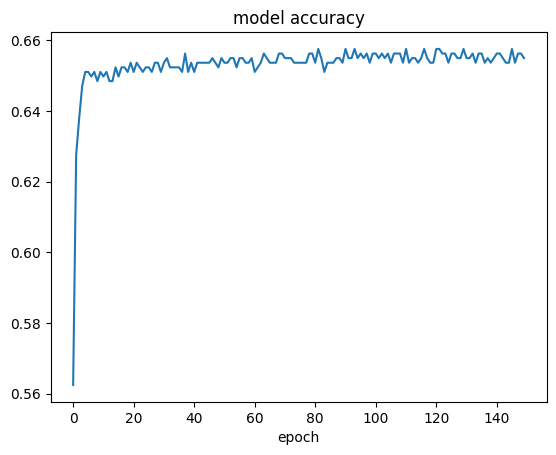

In [7]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['loss'])
plt.title('model accuracy')
# plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()


In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10,)

import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10,)

import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()